In [158]:
import numpy as np
import matplotlib.pyplot as plt
from engineering_notation import *
from BBO import *

<img src="rys1.png" width="600">

Zmienne nieprimowane są na zewnątrz kryształu ($n=1$), a primowane wewnątrz
$$f_{in}=f_{out} \Longrightarrow \frac{v_{in}}{\lambda_{in}}=\frac{c}{\lambda_{out}}\Longrightarrow \frac{1}{\lambda_{in}}=\frac{c}{v_{in}}\frac{1}{\lambda_{out}}=n\frac{1}{\lambda_{out}}$$
$$\lambda_s=\lambda_i\quad\text{Po wyjściu z kryształu foton jałowy i sygnałowy mają mieć tą samą długość fali}$$
$$\frac{1}{\lambda_p}=\frac{1}{\lambda_s}+\frac{1}{\lambda_i}\quad\text{Zasada zachowania energii na zewnątrz kryształu}$$
Z powyższych: $\lambda_s=\lambda_i=2\lambda_p$, a skoro jałowy i sygnałowy są promieniami zwyczajnymi, to $\lambda_s^\prime=\lambda_i^\prime$, więc $k_i^\prime=k_s^\prime$ oraz $\alpha^\prime=\beta^\prime$

$$\vec{k_p^\prime}=\vec{k_s^\prime}+\vec{k_i^\prime}\quad\text{Dopasowanie fazowe w krysztale}$$
$$k_p^\prime=2k_s^\prime\cos\alpha^\prime\quad\text{Tw. cosinusów}$$

$$\frac{n_{e,eff}(\lambda_p,\gamma^\prime+\theta_c)}{\lambda_p}=2\frac{n_o}{\lambda_s} \cos\alpha^\prime$$

In [159]:
def arccos(a):
    return np.arccos(a)


def arcsin(a):
    return np.arcsin(a)


# z artykułu
# lp, THETA_C = 0.3511, np.radians(49.2)
lp, THETA_C = np.radians(40), 0.370

ls = 2 * lp
li = ls

gps = np.linspace(-np.pi, np.pi)
ap = [arccos(neeff(lp, THETA_C + gp) * ls / (2 * no(ls) * lp)) for gp in gps]
bp = ap
plt.plot(np.degrees(gps + THETA_C), np.degrees(ap), label="$\\alpha^\prime$")
plt.xlabel(
    "Kąt między fotonem pompującym, a osią optyczną$\\gamma^\prime+\\theta_c~[^\circ]$"
)
plt.ylabel("$[^\circ]$")
plt.legend()

ValueError: 

$$\sin\gamma = n_{e,eff}(\lambda_p,\gamma^\prime+\theta_c)\sin(\gamma^\prime)\quad\text{Prawo Snelliusa}$$

/tmp/ipykernel_14470/140100031.py:6: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(a)


Text(0, 0.5, '$\\alpha^\\prime~[^\\circ]$')

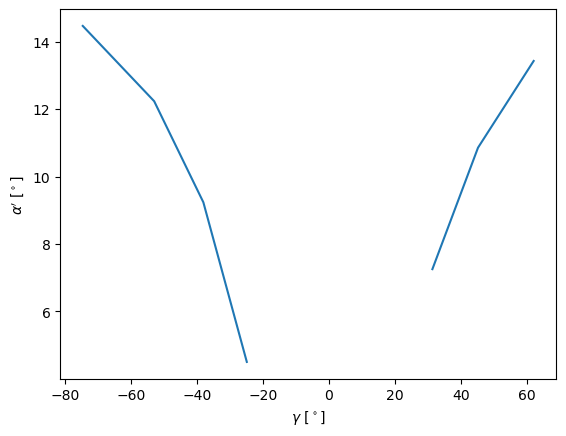

In [ ]:
g = arcsin(neeff(lp, gps + THETA_C) * np.sin(gps))
plt.plot(np.degrees(g), np.degrees(ap))
plt.xlabel("$\\gamma~[^\circ]$")
plt.ylabel("$\\alpha^\prime~[^\circ]$")

Kąt między normalną do boku kryształu, a fotonem pompującym wynosi $\theta^\prime - \theta_c$,\
Więc w zależności od tego jak ma się kąt między fotonem jałowym, a pompującym $\beta^\prime$, będzie w różny sposób nacierał na bok kryształu\
Ponieważ $\beta^\prime=\alpha^\prime < \theta^\prime - \theta_c$, to foton jałowy będzie nacierał tak jak na rysunku:

więc, z prawa Snelliusa,
$$\sin(\beta^\prime-(\theta^\prime-\theta_c))n_o(\lambda_i)=\sin(\beta)$$
$$\sin(\alpha^\prime+(\theta^\prime-\theta_c))n_o(\lambda_s)=\sin(\alpha)$$

/tmp/ipykernel_14470/3873079553.py:6: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(a)


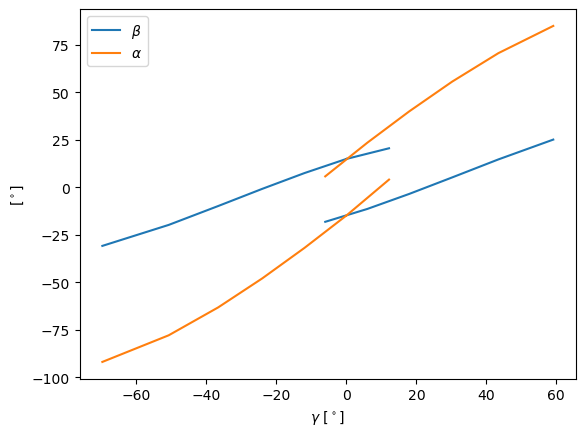

In [ ]:
plt.plot(
    np.degrees(g),
    np.degrees(arcsin(np.sin(gps - bp) * no(ls))),
    label="$\\beta$",
)
plt.plot(
    np.degrees(g), np.degrees(arcsin(np.sin(ap + gps)) * no(li)), label="$\\alpha$"
)
plt.xlabel("$\\gamma~[^\circ]$")
plt.ylabel("$[^\circ]$")
plt.legend()

Linia $\beta$ i $\alpha$ nie przecinają się - czy jest możliwe spełnienie warunków dla takiej długości fali lasera pompującego i tak uciętego kryształu?